# Bus Data Analysis

## Research Question

Which Bus Service takes the least amount of time to reach the nearest MRT station between bus service 870 and 992?

## Executive Summary

asdasdasd

## Introduction

This project focuses on the analysis of Bus trip duration to determine which bus service between 870 and 992 would be better to travel in and out of Tengah new town using the Hypothesis Testing on both samples.



## Objective of this test

This test aims to find out between the two bus services 870 and 992 which bus service is better to take to reach the nearest MRT station at any point of time from the location of Tengah in Singapore and from the location of the 2 MRT station (Bukit Batok or Jurong East)

## Dataset Origin

Both dataset are generated from Numpy to ensure both dataset passes the Normality test in Minitab.

The source code on how would each dataset being generated is in [this link](https://github.com/AngKokLeong/Bus-Data-Analysis/blob/master/data_generator.py) .

Each synthetic data column are generated using Numpy library with this method [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Three synthetic data columns are then combined together to form One Pandas DataFrame for the ease of exporting the data into CSV file.




## Data Collection Method

The sample data are collected through observation on my own personal experience from 01 April 2024 to 26 July 2024 when I was boarding these two bus service 870 and 992 to the nearest MRT station.

The sample data in this test are restricted from 01 April 2024 to 26 July 2024 on the bus trip data retrieved from SimplyGo mobile application.

The two population in this test are the bus trip data of the bus service 992 and 870 that could consist of:
-	Collection of Bus Stop information 
-	Starting time of the bus trip
-	Ending Time of the bus trip
-	Check in time when a bus reaches a bus stop

<sub>Definition of Population: https://www.investopedia.com/terms/p/population.asp </sub>

## Data Dictionary

There are three features in this dataset.

Trip Durations
- Data Type: Float
- The total duration of the Bus Trip from end to end
- The value in this data column represents in minutes (mins)
    - (Computed from the starting time of boarding the bus to the ending time of alighting the bus)

Distances
- Data Type: Float
- Total Distance of the Bus Trip from end to end 
- The value in this data column represents in Kilometres (KM)


There are 164 data records of bus trips for Bus Service 870 and 70 data records of bus trips for Bus Service 992.

There are a total of 117 days.

There are a total of 234 bus trips.

Each day there are two bus trips where the first bus trip is going towards the MRT Station and the second bus trip is from either MRT station (Jurong East or Bukit Batok).

## Test Setup

In [1]:
import pandas
import matplotlib.pyplot
import numpy
import scipy
import sample_data_generator

In [2]:
# Loading data into pandas dataframe

bus_870_dataframe: pandas.DataFrame = pandas.read_csv("bus_870_synthetic_data.csv", usecols=["trip_durations",  "distances"])
bus_992_dataframe: pandas.DataFrame = pandas.read_csv("bus_992_synthetic_data.csv", usecols=["trip_durations",  "distances"])


## Generating Sample Data using Simple Random Sampling Method

In [7]:
bus_870_sample_dataframe: pandas.DataFrame = sample_data_generator.simple_random_sampling(bus_870_dataframe, 50)

In [6]:
bus_992_sample_dataframe: pandas.DataFrame = sample_data_generator.simple_random_sampling(bus_992_dataframe, 50)

Sample data generated by Simple Random Sampling method where 50 sample data are randomly selected from the main dataset collected for this test.

## Exploratory Data Analysis for the sample dataset of Bus 870

#### Five Number Summary for trip_durations in the dataset of Bus 870

In [18]:
five_number_summary_for_bus_870_trip_durations_sample: pandas.Series = bus_870_sample_dataframe["trip_durations"].describe()
bus_870_sample_dataframe["trip_durations"].describe()

count    50.000000
mean     49.917961
std       1.508491
min      46.797819
25%      48.853642
50%      49.708695
75%      50.664293
max      53.988955
Name: trip_durations, dtype: float64

#### Five Number Summary for distances in the dataset of Bus 870

In [19]:
five_number_summary_for_bus_870_distances_sample: pandas.Series = bus_870_sample_dataframe["distances"].describe()
bus_870_sample_dataframe["distances"].describe()

count    50.000000
mean      6.196372
std       0.010651
min       6.175228
25%       6.188040
50%       6.198109
75%       6.203619
max       6.216640
Name: distances, dtype: float64

#### Boxplot for trip_durations in the dataset of Bus 870

<Axes: >

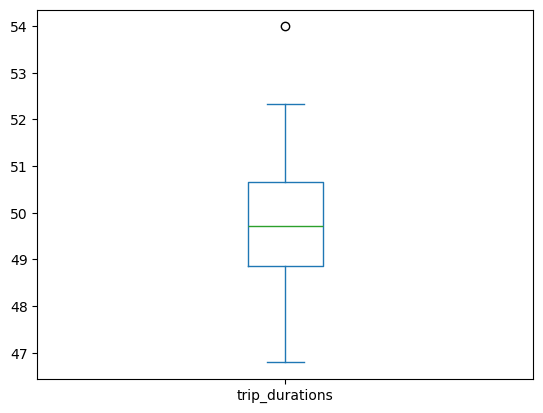

In [11]:
bus_870_sample_dataframe["trip_durations"].plot(kind="box")

#### Boxplot for distances in the dataset of Bus 870

<Axes: >

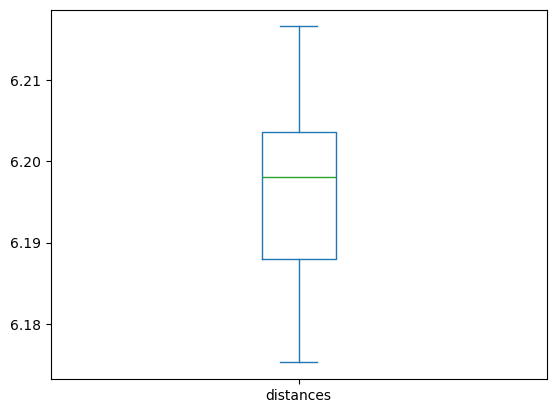

In [10]:
bus_870_sample_dataframe["distances"].plot(kind="box")

## Exploratory Data Analysis for the dataset of Bus 992

#### Five Number Summary for distances in the dataset of Bus 992

In [16]:
five_number_summary_for_bus_992_distances_sample: pandas.Series = bus_992_sample_dataframe["distances"].describe()
bus_992_sample_dataframe["distances"].describe()

count    50.000000
mean      5.998299
std       0.010244
min       5.976641
25%       5.991092
50%       5.998387
75%       6.005463
max       6.017016
Name: distances, dtype: float64

#### Five Number Summary for trip_durations in the dataset of Bus 992

In [17]:
five_number_summary_for_bus_992_trip_durations_sample: pandas.Series = bus_992_sample_dataframe["trip_durations"].describe()
bus_992_sample_dataframe["trip_durations"].describe()

count    50.000000
mean     40.234927
std       1.448704
min      36.620774
25%      39.438387
50%      40.129481
75%      41.175468
max      43.087315
Name: trip_durations, dtype: float64

#### Boxplot on trip_durations in the dataset of Bus 992

<Axes: >

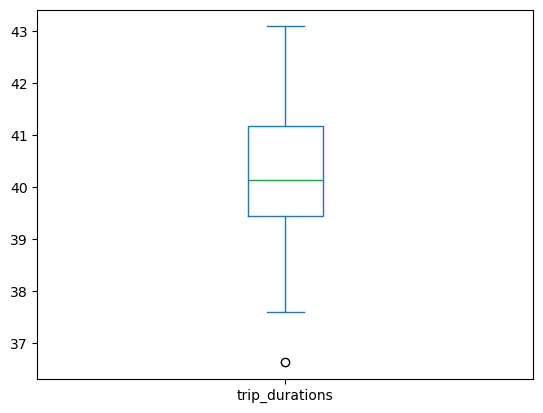

In [14]:
bus_992_sample_dataframe["trip_durations"].plot(kind="box")

#### Boxplot for distances in the dataset of Bus 992

<Axes: >

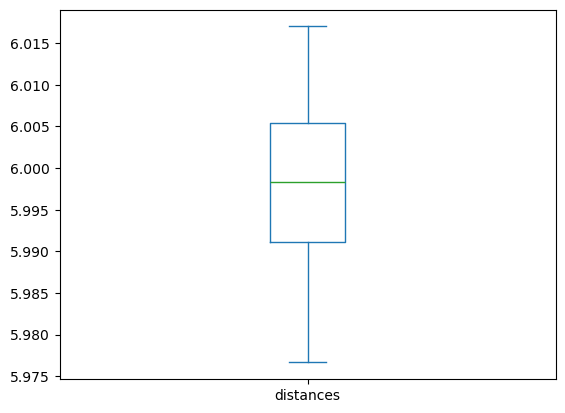

In [15]:
bus_992_sample_dataframe["distances"].plot(kind="box")

## Setting the Level of Significance for this test

Since the accuracy of the bus waiting time and the entire bus trip from end to end needs to be precise, the current <b>Significance Level</b> will be set at <b><u>0.01</u></b>.

## Setting up the Confidence Interval

The setup of the Confidence Interval is using the current configuration where the population standard deviation is unknown therefore, the following formula is used to calculate the lower bound and upper bound of the confidence interval.

point estimate $\pm$ margin of error

$\overline x  \pm  z^*  (\frac{\sigma}{\sqrt n}) $


Reference from https://asciimath.org/ https://docs.mathjax.org/en/latest/index.html https://katex.org/ for mathematical expression in markdown


### Confidence Interval for Bus 870 (Distances)

In [21]:
sample_data_generator.generate_confidence_interval_for_t_test_with_unknown_sigma(0.01,
                                                              five_number_summary_for_bus_870_distances_sample["mean"],
                                                              five_number_summary_for_bus_870_distances_sample["std"],
                                                              data_source=bus_870_sample_dataframe["distances"]
                                                            )

{'Sample_Mean': 6.196371521973807,
 'Lower Bound Confidence Interval': 6.199993926976853,
 'Upper Bound Confidence Interval': 6.192749116970762}

### Confidence Interval for Bus 870 (trip_durations)

In [22]:
sample_data_generator.generate_confidence_interval_for_t_test_with_unknown_sigma(0.01,
                                                              five_number_summary_for_bus_870_trip_durations_sample["mean"],
                                                              five_number_summary_for_bus_870_trip_durations_sample["std"],
                                                              data_source=bus_870_sample_dataframe["trip_durations"]
                                                            )

{'Sample_Mean': 49.917960979076945,
 'Lower Bound Confidence Interval': 50.43100351233759,
 'Upper Bound Confidence Interval': 49.4049184458163}

### Confidence Interval for Bus 992 (Distances)

In [23]:
sample_data_generator.generate_confidence_interval_for_z_test_with_known_sigma(0.01,
                                                              five_number_summary_for_bus_992_distances_sample["mean"],
                                                              five_number_summary_for_bus_992_distances_sample["std"],
                                                              data_source=bus_992_sample_dataframe["distances"]
                                                            )

{'Sample_Mean': 5.998298550501976,
 'Lower Bound Confidence Interval': 5.99492817944569,
 'Upper Bound Confidence Interval': 6.001668921558261}

### Confidence Interval for Bus 992 (trip_durations)

In [24]:
sample_data_generator.generate_confidence_interval_for_z_test_with_known_sigma(0.01,
                                                              five_number_summary_for_bus_992_trip_durations_sample["mean"],
                                                              five_number_summary_for_bus_992_trip_durations_sample["std"],
                                                              data_source=bus_992_sample_dataframe["trip_durations"]
                                                            )


{'Sample_Mean': 40.23492660315212,
 'Lower Bound Confidence Interval': 39.75830980394868,
 'Upper Bound Confidence Interval': 40.71154340235556}

### Test Results for Confidence Interval for all sample dataset and its data column

Trip Durations Bus 992
- Sample Mean: 40.101045565910354
- Upper Bound: 40.50825661442525
- Lower Bound: 39.69383451739546

Distances Bus 992
- Sample Mean: 5.998875895144294
- Upper Bound: 6.001880772395153
- Lower Bound: 5.9958710178934345

Bus 870 trip_duration
- Sample Mean: 49.774774773269144
- Upper Bound: 50.09396492044416
- Lower Bound: 49.45558462609413

Bus 870 Distances
- Sample Mean: 6.199350836959833
- Upper Bound: 6.201267764450136
- Lower Bound: 6.19743390946953


The sample mean for the sample data of Bus 992 trip_durations falls under the Confidence Interval [39.69383451739546, 40.50825661442525] with the significance level of 0.01 and the sample mean of 40.101045565910354.

The sample mean for the sample data of Bus 992 distances falls under the Confidence Interval [5.9958710178934345, 6.001880772395153] with the significance level of 0.01 and the sample mean of 5.998875895144294.

The sample mean for the sample data of Bus 870 trip_durations falls under the Confidence Interval [49.45558462609413, 50.09396492044416] with the significance level of 0.01 and the sample mean of 49.774774773269144.

The sample mean for the sample data of Bus 870 distances falls under the Confidence Interval [6.19743390946953, 6.201267764450136] with the significance level of 0.01 and the sample mean of 6.199350836959833.

## Conducting Normality Test on Sample Dataset

In [25]:
scipy.stats.normaltest(bus_870_sample_dataframe["distances"])

NormaltestResult(statistic=1.7109887223051812, pvalue=0.42507299955329736)

In [26]:
scipy.stats.normaltest(bus_870_sample_dataframe["trip_durations"])

NormaltestResult(statistic=0.9417214975971964, pvalue=0.6244645297932351)

In [27]:
scipy.stats.normaltest(bus_992_sample_dataframe["distances"])

NormaltestResult(statistic=3.2905258526206684, pvalue=0.19296182138369639)

In [28]:
scipy.stats.normaltest(bus_992_sample_dataframe["trip_durations"])

NormaltestResult(statistic=0.06304926325646694, pvalue=0.968967088922688)

The p-value for the sample data of Bus 870 is 0.86.

The p-value for the sample data of Bus 992 is 0.89.

Since the alpha = 0.01 and the p-value for both sample data is above 0.01.

Therefore, the alternative hypothesis where the sample data extracted from the population does not follow the normal distribution is rejected.

The sample data for Bus 870 and Bus 992 are retrieved from the population dataset where it follows the normal distribution so the following hypothesis test can be used:

- Paired t-test
- Two-sample independent t-test
- ANOVA F-test



## Setup of Two Sample Independent t-test

Two Sample T-Test is selected due to two sample dataset which contains data of bus trip for 870 and 992 are two independent bus service.

In Normality test conducted earlier, the sample dataset for Bus service 870 and 992 are tested and determined that both sample dataset are extracted from population dataset follows normal distribution.



### Conduct F-Test to verify for Equal Variance

In [ ]:



# Reference from Scipy documentation for Two Sample Independent t-test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html




## Conduct Two Sample T-Test with Equal Variances

Since the test results from the F-Test indicates that the

Possible Errors (Type I/II) could be committed

## Summary